In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv('https://www.kaggle.com/mehdidag/black-friday/downloads/BlackFriday.csv')#, sep='delimiter', header=None) # Source of this dataset is kaggle
df.head()
#df1=df[['Gender', 'Age','Occupation', 'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase']]
#df1.head()# Display a subset of Data to show the desired columns under study

ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 2


In [27]:
a=np.extract(df1['Age']=='0-17', df1['Purchase'])
print (a)
#for record in a:
 #   print (record)

[ 8370 15200  1422 ...  7458  3706  2304]


# Visual I

In [3]:
# Visual I gives the look and feel of the most crucial column the purchases on Black Friday.
print ("The maximum purchase value is {}" .format((df1['Purchase'].max())))
print ("The minimum purchase value is {}" .format((df1['Purchase'].min())))


The maximum purchase value is 23961
The minimum purchase value is 185


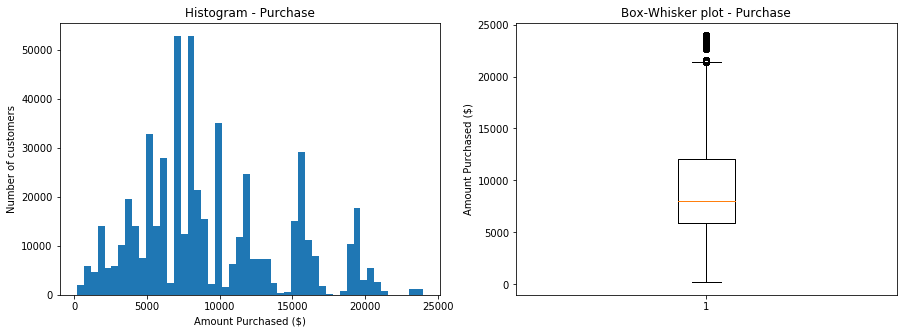

In [4]:
plt.figure (figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(df1['Purchase'], bins=50) # Main Column distribution analysis
plt.xlabel("Amount Purchased ($)")
plt.ylabel("Number of customers")
plt.title("Histogram - Purchase")

plt.subplot(1,2,2)
plt.boxplot(df1['Purchase']) # Main Column distribution analysis
plt.ylabel("Amount Purchased ($)")
plt.title("Box-Whisker plot - Purchase")
plt.show()

The above Histogram shows the distribution of the Purchases made by customers during Black Friday. We can see that the highest number of customers made purchases between $5,000 to $10,000. Above $20,000 are only few customers.

The above Boxwhisker plot shows the range of purchase amounts made by customers. The IQR appears to be from $5000 to $12,000 which is where most of the purchases are made. The median is the orange line which is around $8,000. The Whiskers are denoting the purchases made 1.5times of the IQR. The fliers denote the outliers which are quite a few above $20,000.


# Visual II

In [5]:
df_groupby=df1.groupby('Gender').aggregate((np.sum))
df_groupby_purchase=df_groupby['Purchase']
df_groupby_purchase

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

In [6]:
gender_value_counts=df1['Gender'].value_counts().sort_values()

In [7]:
df_groupby_purchase/gender_value_counts

Gender
F    8809.761349
M    9504.771713
dtype: float64

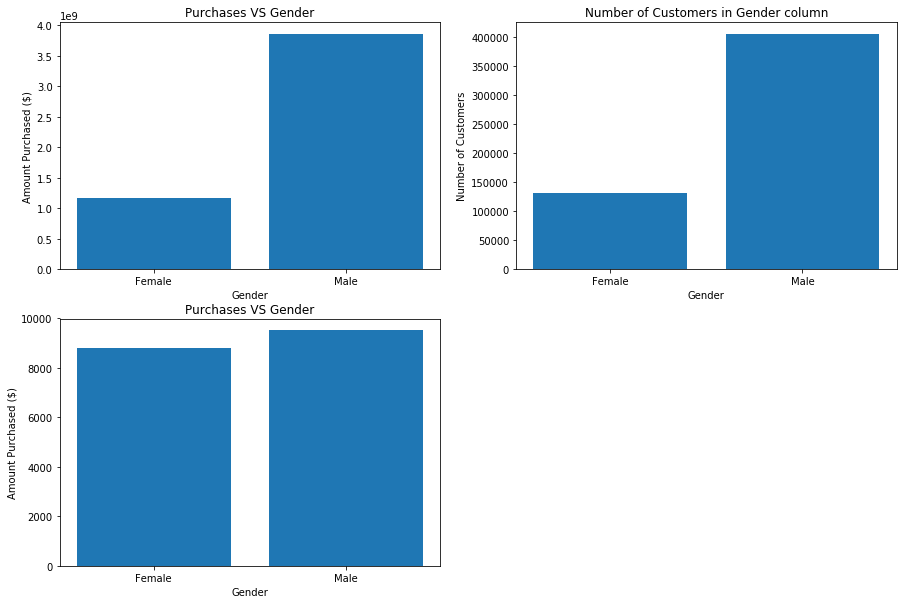

In [8]:
plt.figure (figsize=(15,10))

plt.subplot(2,2,1)
x_values=np.arange(1,3)
plt.bar(x_values, df_groupby_purchase)
plt.xticks(x_values, ('Female', 'Male'))
plt.xlabel("Gender")
plt.ylabel("Amount Purchased ($)")
plt.title("Purchases VS Gender")

plt.subplot(2,2,2)
plt.bar(x_values,gender_value_counts)
plt.xticks(x_values, ('Female', 'Male'))
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.title("Number of Customers in Gender column")

plt.subplot(2,2,3)
plt.bar(x_values,df_groupby_purchase/gender_value_counts)
plt.xticks(x_values, ('Female', 'Male'))
plt.xlabel("Gender")
plt.ylabel("Amount Purchased ($)")
plt.title("Purchases VS Gender")
plt.show()


Top left:
This representation reveals the purchases made on Black friday gender wise. From this graph it appears that Males purchase around 3 times more than Females.  However, this might not be true since we did not see if equal number of males and females were considered for this study.

Top Right:
 When the dataframe was counted for number of males and number of females in the Gender column, we get the count as a series 'gender_value_counts'. This gave the count of males as 3 times more than females. There were more number of males and so we got more purchases and vice versa with females. So this explains why we have seen more purchases by males than females.
 
Bottom left:
In order to solve this problem, I have normalized the data by dividing the purchases of males by number of males and purchases of females by number of females. This is what we see in this graph where the Tptal purchases made by males and females are aprroximately tending to be equal. Ofcourse this needs to further confirmed statistically but visually there is no difference in purchases made based on Gender on a Black Friday.

# Visual III

In [1]:
#Visual III
df_groupby=df1.groupby('Stay_In_Current_City_Years')
df_groupby['Purchase']

NameError: name 'df1' is not defined

In [10]:
counts=df1['Stay_In_Current_City_Years'].value_counts()
counts

1    189192
2     99459
3     93312
5     82889
0     72725
Name: Stay_In_Current_City_Years, dtype: int64

In [11]:
norm_years=df_groupby['Purchase']/counts # Normalized data for Stay_in_current_city_years
norm_years

0    9247.238625
1    9319.865095
2    9397.607316
3    9350.685121
5    9346.370158
dtype: float64

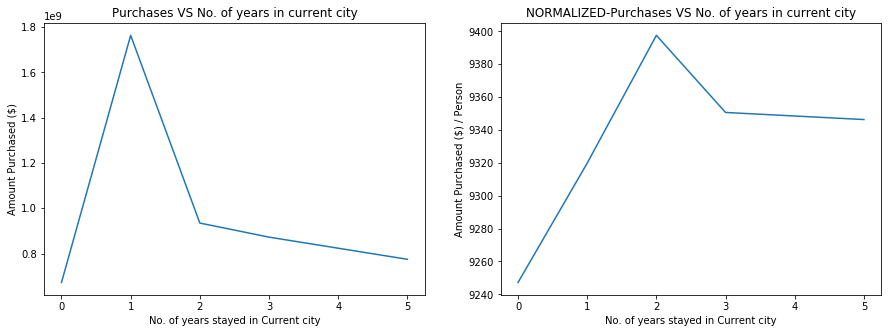

In [12]:
plt.figure (figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(df_groupby['Purchase'])
plt.xlabel("No. of years stayed in Current city")
plt.ylabel("Amount Purchased ($)")
plt.title("Purchases VS No. of years in current city")

plt.subplot(1,2,2)
plt.plot(norm_years)
plt.xlabel("No. of years stayed in Current city")
plt.ylabel("Amount Purchased ($) / Person")
plt.title("NORMALIZED-Purchases VS No. of years in current city")
plt.show()

Left:
The above representation reveals that maximum black friday purchases are made by customers when they stay one year in city atleast. There is steep downfall in purchases after First year. The purchases go down gradually from 2nd to 5th year. But this is the aggregate purchase made by customers year wise.

Right:
However, since the Left: figure is not true representation for data I have normalized the data to the number of persons in each year. This gives us the Amount purchased per person for number of years stayed in current city. We see that maximum purchases are made by a person around 2years stay and there was steep increase till 2nd year. Afterwhich, there is a downfall at 3rd year and stays around the same or decreases by year 5.

# Visual IV

In [12]:
#Visual IV
age_groupby=df1.groupby('Age').aggregate((np.sum))
age_groupby=age_groupby['Purchase']
age_groupby

Age
0-17      132659006
18-25     901669280
26-35    1999749106
36-45    1010649565
46-50     413418223
51-55     361908356
55+       197614842
Name: Purchase, dtype: int64

In [13]:
counts=df1['Age'].value_counts()
counts

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

In [14]:
norm_age=age_groupby/counts
norm_age

0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
dtype: float64

In [15]:
Marital_Status_groupby=df1.groupby('Marital_Status').aggregate((np.sum))
Marital_Status_groupby=Marital_Status_groupby['Purchase']
Marital_Status_groupby

Marital_Status
0    2966289500
1    2051378878
Name: Purchase, dtype: int64

In [16]:
counts=df1['Marital_Status'].value_counts()
counts

0    317817
1    219760
Name: Marital_Status, dtype: int64

In [17]:
norm_marital_status=Marital_Status_groupby/counts
norm_marital_status

Marital_Status
0    9333.325467
1    9334.632681
dtype: float64

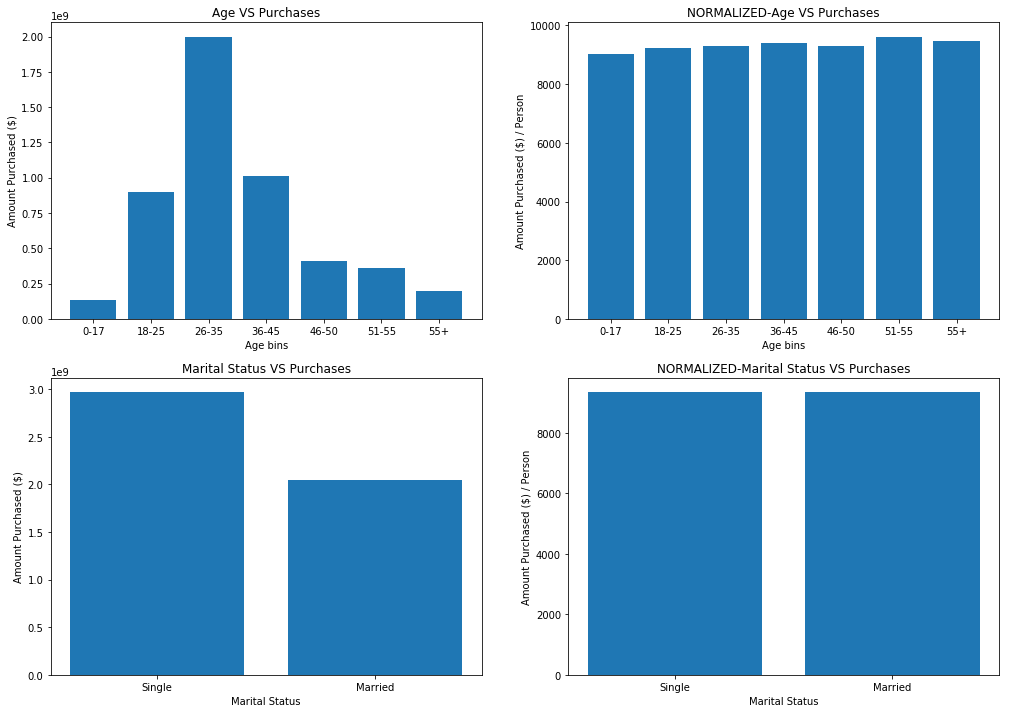

In [21]:
plt.figure (figsize=(17,12))

plt.subplot(2,2,1)
x_values=np.arange(1,8)
plt.bar(x_values, age_groupby)
plt.xticks(x_values, np.unique(df1['Age']))
plt.xlabel("Age bins")
plt.ylabel("Amount Purchased ($)")
plt.title("Age VS Purchases")

plt.subplot(2,2,2)
x_values=np.arange(1,8)
plt.bar(x_values, norm_age)
plt.xticks(x_values, np.unique(df1['Age']))
plt.xlabel("Age bins")
plt.ylabel("Amount Purchased ($) / Person")
plt.title("NORMALIZED-Age VS Purchases")

plt.subplot(2,2,3)
x_values=np.arange(1,3)
plt.bar(x_values, Marital_Status_groupby)
plt.xticks(x_values, ('Single', 'Married'))
plt.xlabel("Marital Status")
plt.ylabel("Amount Purchased ($)")
plt.title("Marital Status VS Purchases")

plt.subplot(2,2,4)
x_values=np.arange(1,3)
plt.bar(x_values, norm_marital_status)
plt.xticks(x_values, ('Single', 'Married'))
plt.xlabel("Marital Status")
plt.ylabel("Amount Purchased ($) / Person")
plt.title("NORMALIZED-Marital Status VS Purchases")
#plt.tight_layout()
plt.show()

Top Left:
This representation reveals the purchases made on Black friday age wise. From this graph it appears that customers in age bin 26-35 years purchased the highest atleast 2 times more than other ages. This age group was followed by 18-25 and 36-45. Ages 0-17 and 55+ were among the bottom two bins in purchase amounts. This is true only if there are equal number of people in age bin otherwise this will give false results.

Top Right:
This representation is the normalized version of the one on left. Here the aggregate of the purchases made according to age are divided by the number of people in each age bin. Thus giving the Purchase amounts per person which is the true represenation of the data as there is only one variable in the question i.e the age and not the number of people being used for aggregation of purchase amounts. Since all the amounts look more or less same, we can safely conclude from this data here that there is no influence of age on the purchase amounts on black friday.

Bottom Left:
This representation reveals the purchases made on Black friday Marital Status wise. It appears from this graph that Single Marital Status made more purchases than Married. Again, this data needs to be analysed further for the number of Singles and number of Married considered. If we want to make meaningful conclusion based on marital status the number of Singles or Married considered should be equal.

Bottom Right:
This representation is the normalized version of the one on left. Here the aggregate of the purchases made according to marital status are divided by the number of people in each group (Single or Married). Since the two groups here appear to have similar purchase amounts we conclude from this data here that Marital staus does not have any effect on purchasing amount on black friday.